### Visualization - Matplotlib, Seaborn, Plotly, Cufflinks
1. Clear, effective data visualization is key to optimizing your ability to convey findings.
2. Line -> Very Basic graph
3. scatter plots -> to display data points on horizontal and vertical axes. Give insite into 2 variables correlation or scatterness of the data.
4. Bar plots -> really powerful when calling aggregate functions on dataset. Bar plots can be stacked for comparision.
5. Box Plots -> used to display distribution, central value and variability of distribution of data.
6. Surface plots -> used for generating three dimensional plots
7. Histogram plots -> used to display the distribution of a conntinuous numerical dataset
8. Spred plots ->  often used for stock comparison
9. Bubble plots -> generally used to display data over world map
10. Scatter matrix -> Used for multiple column data comparision or graphical representation of heatmap

### Matplotlib Vs Seaborn Vs Plotly
1. Seaborn is built on matplotlib, so you can use them concurrently. Seaborn simply has its own library of graphs, and has pleasant formatting built in. However, it does not have all of the same capabilities of matplotlib. For instance, if you want to create the a histogram, with the two variables stacked next to each other as opposed to overlaid, you would need to fall back to matplotlib.
2. Plotly: 
    * Matplotlib and Seaborn may be the most commonly used data visualization packages, but there is a simpler method that produces superior graphs than either of these: Plotly.
    * Plotly graphs are automatically outfitted with hover tool capabilities — hovering your mouse over any of the bars of data will display the numerical values.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from itertools import count
import random
%matplotlib inline

In [3]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf

In [2]:
pd.set_option('display.max_rows', 100)

In [3]:
na_vals = ['NA', 'Missing']
df_raw = pd.read_csv('data\StackOverFlow 2019 Survey\survey_results_public.csv', index_col='Respondent', na_values=na_vals)
df_raw.head(2)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


In [4]:
# Take just 100 random samples
df = df_raw.sample(n=100)
df.head(2)
df.reset_index(drop=True, inplace=True)

In [5]:
df.select_dtypes(include = [np.number]).columns

Index(['CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs', 'Age'], dtype='object')

### Using Pandas:
1. VVV IMP GO through - Quick easy plots by example - https://towardsdatascience.com/9-pandas-visualizations-techniques-for-effective-data-analysis-fc17feb651db

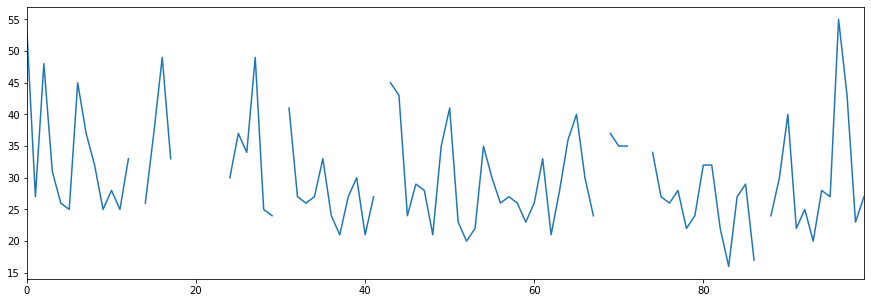

In [6]:
# Pandas.Series.plot() - Make plots of Series using matplotlib / pylab.
# On one single column
df['Age'].plot(figsize =(15,5)) # broken plot is due to NaNs

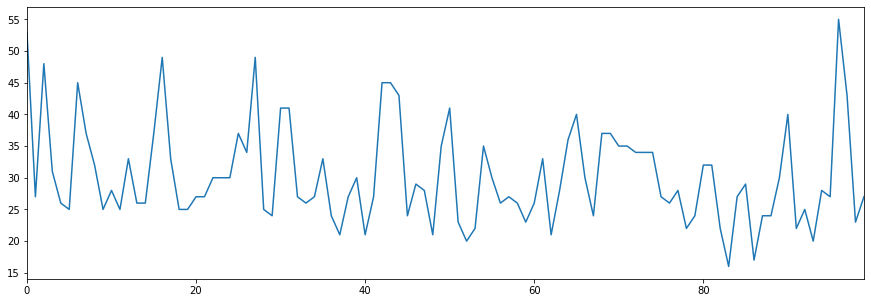

In [7]:
# lets do a backward fill for all integer columns
df.fillna(method='bfill', inplace=True)
# df.fillna(method='ffill', inplace=True)
df['Age'].plot(figsize =(15,5))

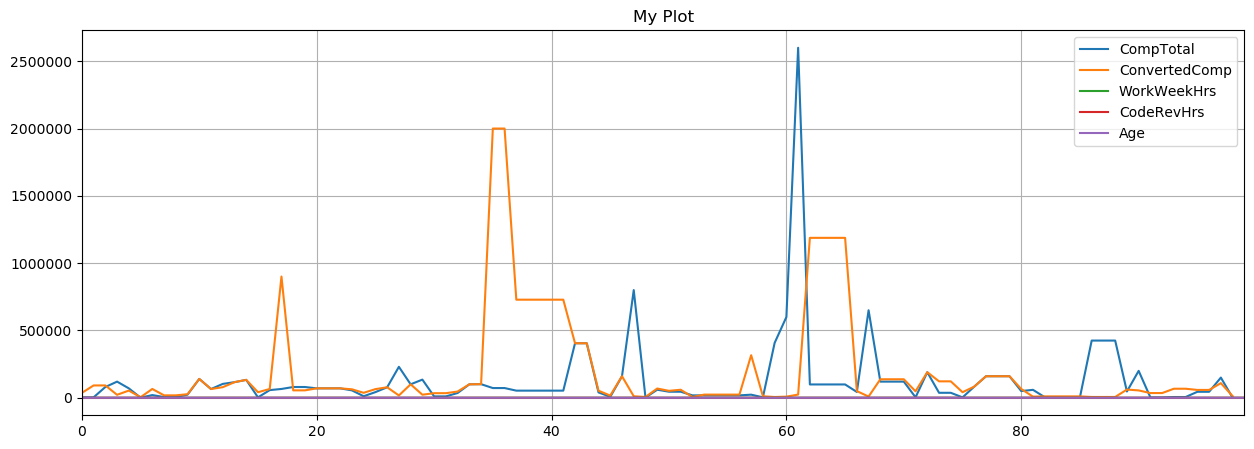

In [43]:
# On entire dataframe. It automatically takes only integer columns
df.plot(figsize=(15,5), title='My Plot', grid=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1E0FCB68>,
      dtype=object)

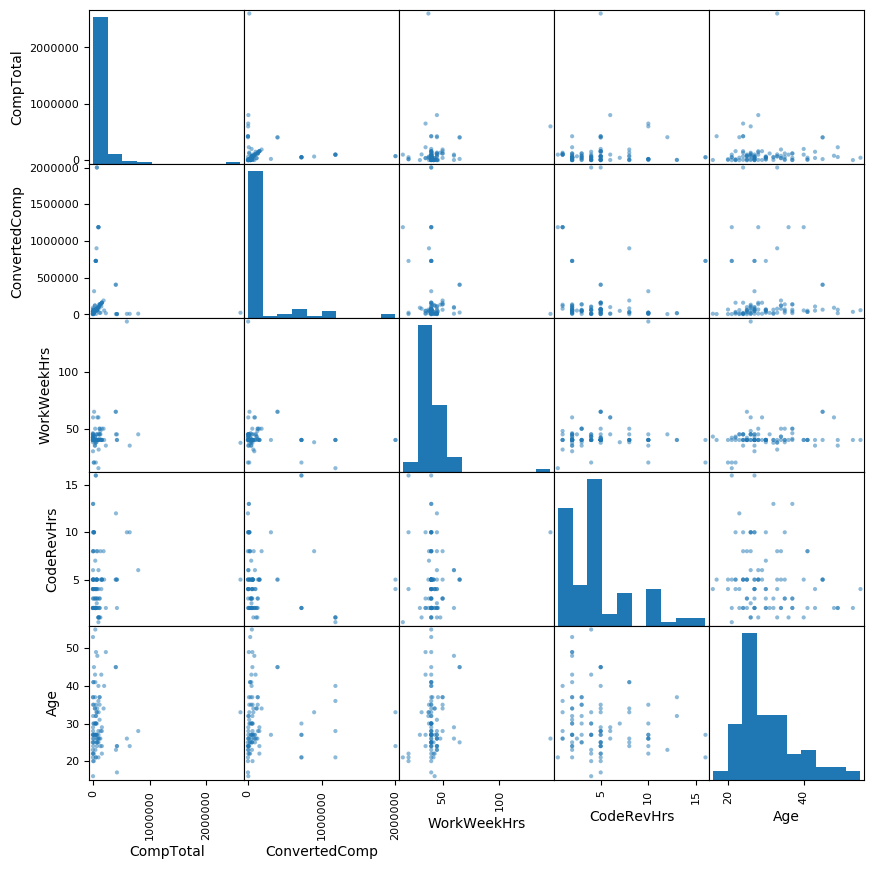

In [117]:
# This is particularly useful to analyse all variables in dataset for correlation
# this is like heatmap n seaborn
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10, 10))

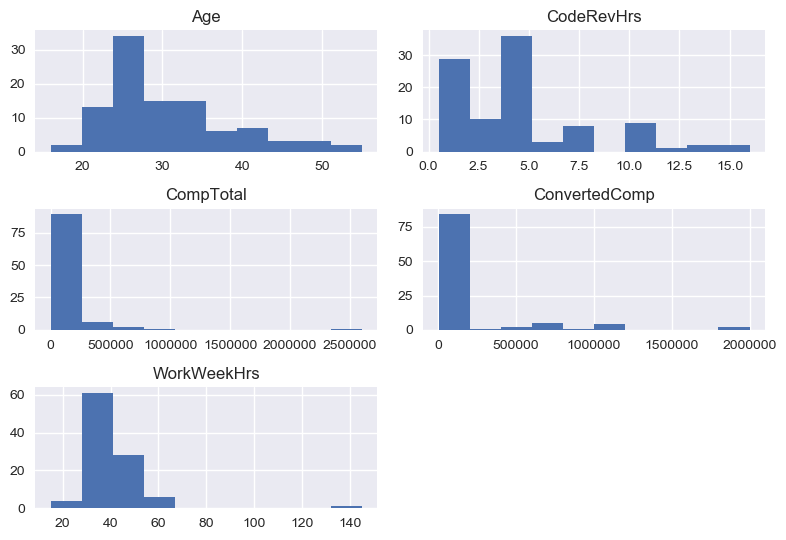

In [105]:
df.hist()
plt.tight_layout()

### Using Directly Matplotlib:

### Line Plot:
1. Vey basic not so useful plot. Shows general behaviour of data

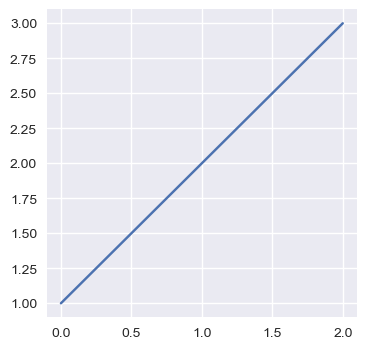

In [102]:
# with only one array, plot is against the index of the list. So x=index, y=data
plt.figure(figsize=(4,4))
plt.plot([1,2,3])

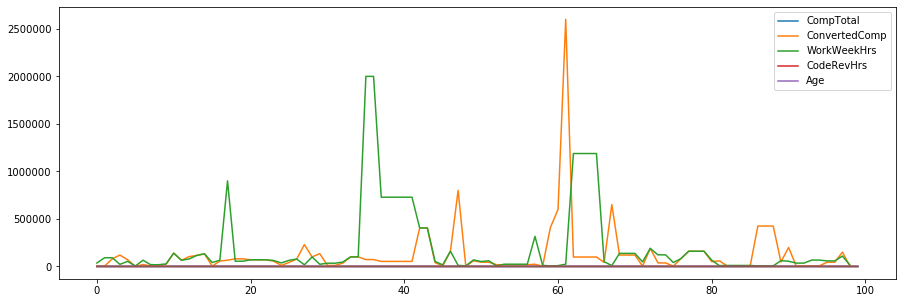

In [9]:
# plt.plot is a matplotlib function and df.plt is a pandas function, both does the same things
# But plt.plot takes x, y as its arguments or a Series as a argument. It cannot automatically plot from dataframe
plt.figure(figsize=(15,5))
# plt.plot(df) Error it cannoto handle enitre df
plt.plot(df['Age']) # for Series
# this cannot automatically draw a plot from df using int columns as pandas plot does
plt.plot(df[['CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs', 'Age' ]])
# see how by defualt this does not provide a legend where as pandas provide.
plt.legend(['CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs', 'Age' ])

In [10]:
# Basic commands and arguments usage - go through this
# https://matplotlib.org/tutorials/introductory/pyplot.html?highlight=format%20string#formatting-the-style-of-your-plot

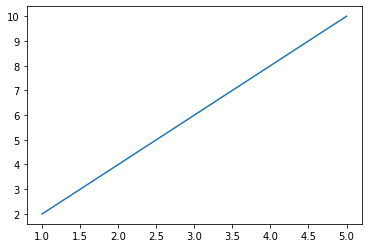

In [11]:
# Basic simple my understanding of plt.plot synta is like this
x = [1,2,3,4,5]
y = [2,4,6,8,10]
plt.plot(x, y)

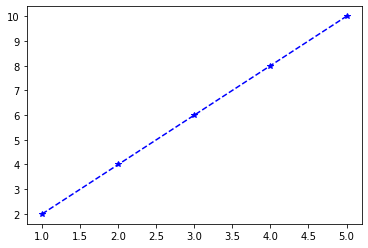

In [12]:
# every x, y pair of arguments, there is an optional third argument which is the format string that indicates 
# the color and line type of the plot.
# fmt = '[marker][line][color]' , All three are optional, and any combination is fine too
# plt.plot(x, y, 'o-r')
plt.plot(x, y, '*--b')
# plt.plot(x,y, 'ko')
# plt.plot(x, y, 'g^', x, [z**2 for z in y], 'bo')
# plt.plot(x, y, 'ob:')

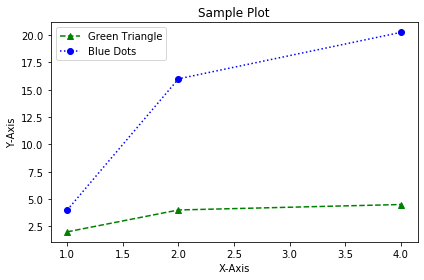

In [15]:
z = [a**2 for a in y]

plt.plot(x, y, '^--g', x, z, 'o:b')
plt.legend(['Green Triangle', 'Blue Dots'])
plt.title('Sample Plot')
plt.xlabel('X-Axis') # If you do plt.xlabel = 'X-Axis' it will case a strange error with Notebook
plt.ylabel('Y-Axis') # https://stackoverflow.com/questions/24120023/strange-error-with-matplotlib-axes-labels
plt.tight_layout() # this will solve padding issue.

Note: with some widths the dotted lines will get hidden. So this can be corrected by correcting the order in which we plot the graphs. Make sure dotted lines are plotted after solid lines.

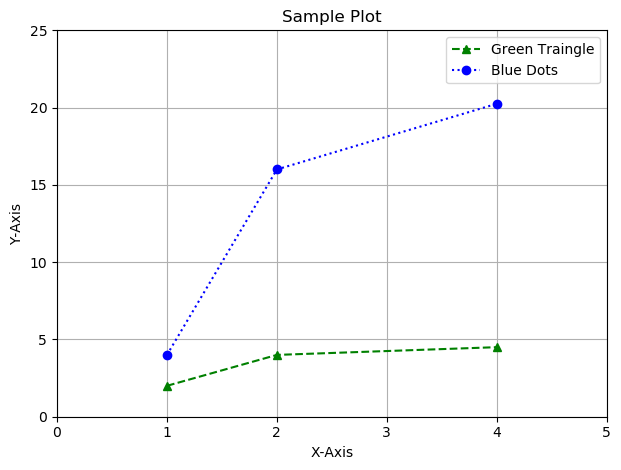

In [39]:
# Some good practice, Call individual plots and pass labels as arguemtn and then call plt.legend()
plt.plot(x, y, '^--g', label='Green Traingle')
plt.plot(x, z, 'o:b', label='Blue Dots')
plt.legend()
plt.title('Sample Plot')
plt.xlabel('X-Axis') # If you do plt.xlabel = 'X-Axis' it will case a strange error with Notebook
plt.ylabel('Y-Axis') # https://stackoverflow.com/questions/24120023/strange-error-with-matplotlib-axes-labels
plt.tight_layout() # this will solve padding issue.
# plt.axis([xmin, xmax, ymin, ymax ]) 
plt.axis([0, 5, 0, 25])
plt.grid(True)

[0, 5, 0, 25]

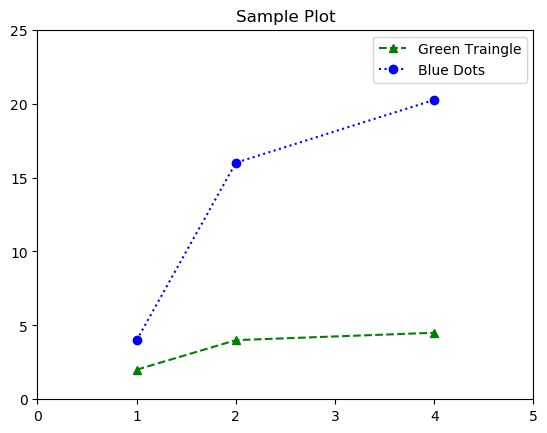

In [38]:
# Shows all the preexisting styles
# plt.style.available
plt.plot(x, y, '^--g', label='Green Traingle')
plt.plot(x, z, 'o:b', label='Blue Dots')
plt.legend()
plt.title('Sample Plot')
# give a style to your plot. Make sure not to use any personal styling in plt.plot otherwise the plt.style 
# will be shadowed by your settings.
plt.style.use('fivethirtyeight')
# plt.style.use('default') # default it back after above code
plt.axis([0, 5, 0, 25])
# plt.savefig(‘C:/plot.png’) → Save the file in specified path.

### Bar Plots: 
1. Bar plots basically represent the data in bars. They are ver similar to Line plots.
2. Bar plots are mainly useful to show averages or counts of entries.

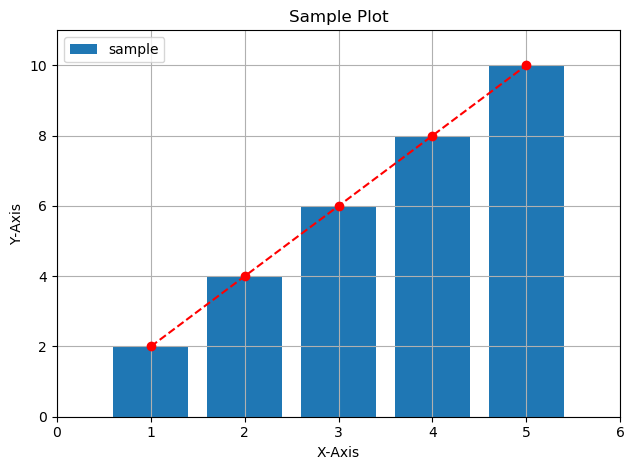

In [61]:
x = [1,2,3,4,5]
y = [2,4,6,8,10]

plt.bar(x,y, label='sample')
# Beautification is pretty much same as plt.plot
plt.legend(loc='upper left')
plt.title('Sample Plot')
plt.xlabel('X-Axis') # If you do plt.xlabel = 'X-Axis' it will case a strange error with Notebook
plt.ylabel('Y-Axis') # https://stackoverflow.com/questions/24120023/strange-error-with-matplotlib-axes-labels
plt.tight_layout() # this will solve padding issue.
# plt.axis([xmin, xmax, ymin, ymax ]) 
plt.axis([0, 6, 0, 11])
plt.grid(True)
plt.plot(x,y,'o--r')

<BarContainer object of 5 artists>

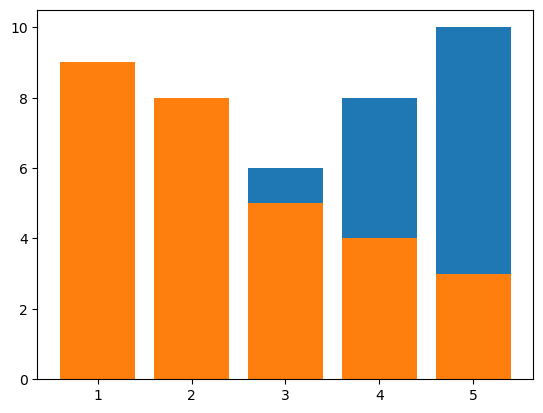

In [60]:
# Stacked plots, everything else remains same
z = [9,8,5,4,3]
plt.bar(x,y)
plt.bar(x,z) #Just for sample
# Better way of doing that is use seaborn or look for my code in comments section of this video
# https://www.youtube.com/watch?v=nKxLfUrkLE8&list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_&index=2

### Histogram: 
1. Histograms are great for visualising the distribution of data, where data falls between certain boundaries. A histogram groups the data into bins/range, instead of plotting each data individually. 
3. Its great visualization for continuous data.
2. Bar Vs Histogram: 
    * Bar Graphs are good when your data is in categories (such as 'comedy' 'drama')
    * When you have continuous data (like person 'height')  use Histogram
    * Its better to leave gaps between the bars other wise it will look like histogram.
    <img src="images/image63.png" align="middle" style="width:400px; height:200px" />  
3. https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html

(array([5., 3., 1., 2., 1.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. ]),
 <a list of 5 Patch objects>)

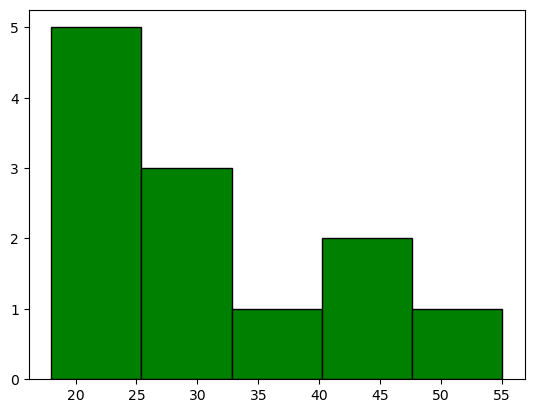

In [73]:
#bins as value:
ages = [18,19,21,20,25,26,30,32,38,45,55,42]
# density=True normalizes the y axis
plt.hist(ages, bins=5, density=False, facecolor='green', edgecolor='black')

(array([2., 4., 3., 2., 1.]),
 array([10, 20, 30, 40, 50, 60]),
 <a list of 5 Patch objects>)

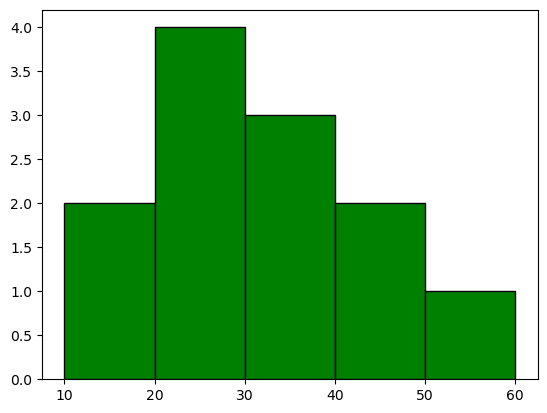

In [71]:
# bins as list
# bins will be 10-19, 20-29..
bins = [10,20,30,40,50,60]
# See the difference in the look
plt.hist(ages, bins=bins, density=False, facecolor='green', edgecolor='black')

### Scatter plots:
1. Scattered  plots are best used for find correlation between two variable.

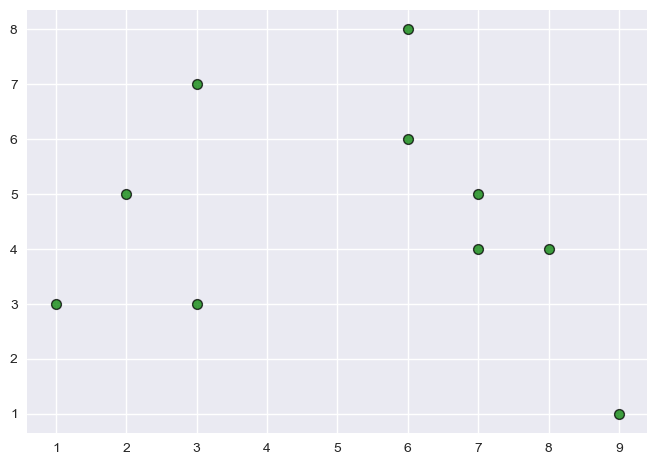

In [83]:
# Scatter plots 
# s = size of dots, c= color of dots, marker='X'for marker
plt.style.use('seaborn')
x = [2,3,8,6,7,9,3,6,7,1]
y = [5,3,4,8,4,1,7,6,5,3]
plt.scatter(x,y,s=50, color='green', edgecolor='black', linewidth=1, alpha=0.75)

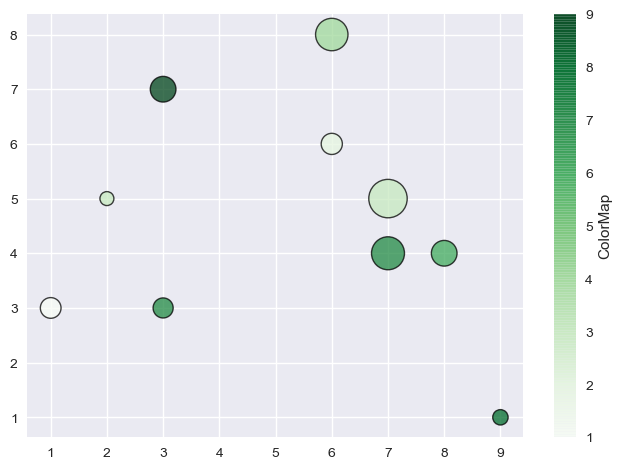

In [91]:
# we can add multiple color and sizes per datapoint which will allow us to add additional dataset.
# assume colors relates to x, y in some way
colors = [3,7,6,4,7,8,9,2,3,1]
sizes = [101, 209, 342, 545, 564, 123, 342, 232, 765, 222]
#cmap --> 'colormap' provides specific color to the dots rather than on gray scale
plt.scatter(x,y,s=sizes, c=colors, edgecolor='black', cmap='Greens', linewidth=1, alpha=0.75) 
# Adding a color bar legend 
cbar = plt.colorbar()
cbar.set_label('ColorMap')

### Plotting Date Time Series Data:

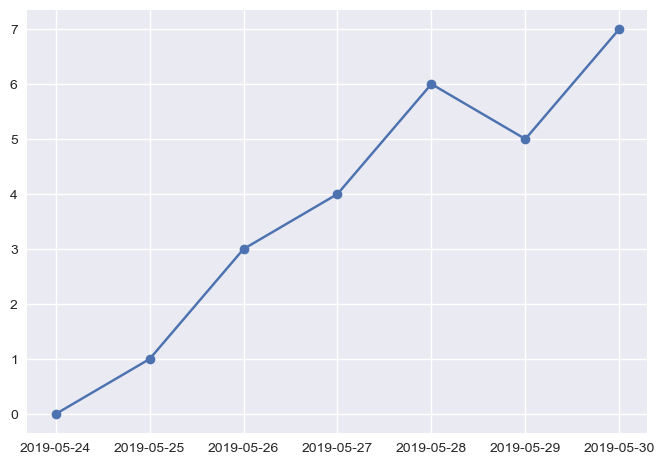

In [99]:
from datetime import datetime, timedelta
plt.style.use('seaborn')
dates = [
    datetime(2019, 5, 24),
    datetime(2019, 5, 25),
    datetime(2019, 5, 26),
    datetime(2019, 5, 27),
    datetime(2019, 5, 28),
    datetime(2019, 5, 29),
    datetime(2019, 5, 30)
]
y = [0, 1, 3, 4, 6, 5, 7]

plt.plot_date(dates, y, linestyle='solid') # Basic plot

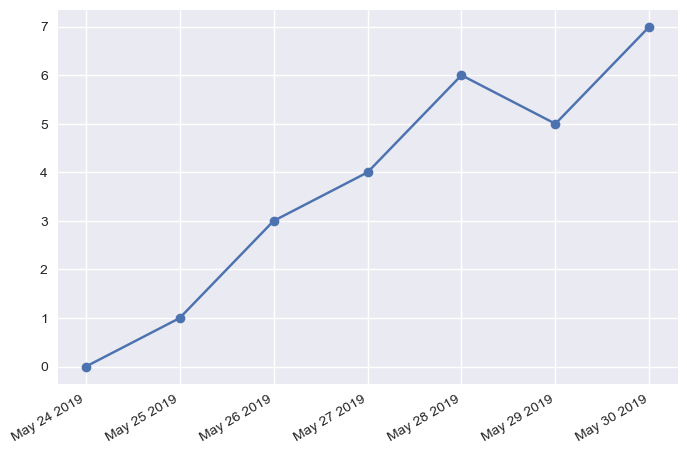

In [100]:
from matplotlib import dates as mpl_dates
plt.plot_date(dates, y, linestyle='solid')
# plt.gcf -> get current figure
plt.gcf().autofmt_xdate()
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
date_format = mpl_dates.DateFormatter('%b %d %Y')
#plt.gca -> get current axis
plt.gca().xaxis.set_major_formatter(date_format)

In [116]:
plt.style.use('default')

### Live Data Plotting:
https://www.youtube.com/watch?v=Ercd-Ip5PfQ&list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_&index=9

In [131]:
from matplotlib.animation import FuncAnimation
from itertools import count
plt.style.use('fivethirtyeight')
%matplotlib inline

In [134]:
# Try this code in Pycharm, This is not working here
x_vals = []
y_vals = []
index = count()

def animate(i):
    x_vals.append(next(index))
    y_vals.append(random.randint(0,5))
    plt.cla() # clears the axis so we see only one color graph
    plt.plot(x_vals, y_vals)
    
ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

### SubPlots:
1. We aren't actuallt been creating a object from class plot until now. All we did was use one object that we get from importing "import matplotlib.pyplot as plt" and use it for single figure. This is called as stateful. It called so because, the pyplot as a current state in terms of what figure we are curently working with.

In [139]:
x = [1,2,3,4,5]
y1 = [8,5,3,4,6]
y2 = [3,4,7,2,6]
y3 = [4,6,9,3,2]

Text(0, 0.5, 'Y')

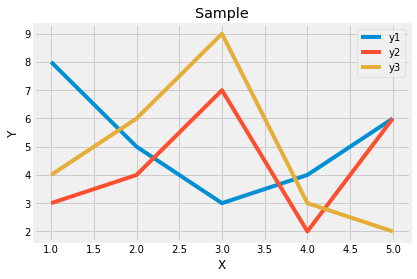

In [144]:
# figure - A figure is a box which will hold our plot
# axis - Is a region or sub region in the figure
fig, ax = plt.subplots() # by default number of axes is (1x1)
ax.plot(x,y1, label='y1')
ax.plot(x,y2, label='y2')
ax.plot(x,y3, label='y3')
ax.legend()
ax.set_title("Sample")
ax.set_xlabel('X')
ax.set_ylabel('Y')

Text(0, 0.5, 'Y')

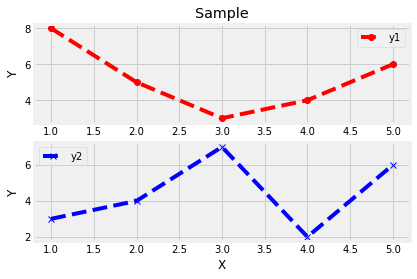

In [152]:
# Example for 1 fig and 2 axis
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,) # sharex = True
ax1.plot(x,y1, 'o--r', label='y1')
ax2.plot(x,y2, 'x--b', label='y2')
ax1.legend()
ax1.set_title("Sample")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.legend()
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

Text(0, 0.5, 'Y2')

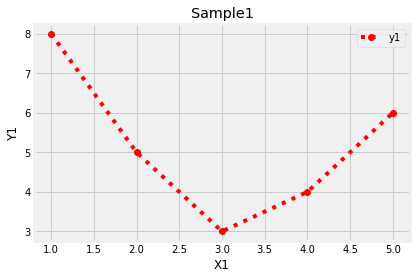

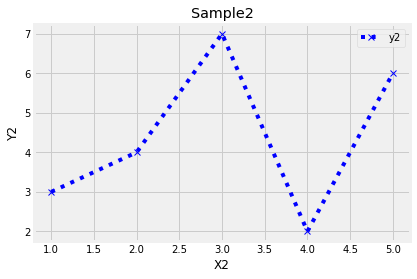

In [156]:
# 2 figs and 1 axis on each. Better seen on pycharm
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
ax1.plot(x,y1, 'o:r', label='y1')
ax2.plot(x,y2, 'x:b', label='y2')
ax1.legend()
ax1.set_title("Sample1")
ax1.set_xlabel('X1')
ax1.set_ylabel('Y1')
ax2.legend()
ax2.set_title("Sample2")
ax2.set_xlabel('X2')
ax2.set_ylabel('Y2')

### Box Plots: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
1. To analyse a dataset sometimes its not just enough to know the centre of distribution(mean, median and mode). We would have to go beyound that to knwo the variablility of distribution which will give us a better picture. Which is what BOXPLOT gives us.
1. A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are
2. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.
3. https://www.coursera.org/lecture/basic-statistics/1-05-range-interquartile-range-and-box-plot-RbWIZ
4. Outliera = Q1 - IQR*1.5 and Q3 + IQR*1.5

## Plotly:https://plotly.com/python/
1. Plotly is a free and open-source graphing library for Python.Especially for interactive graphs.
2. __Cufflinks__: Cufflinks is a third-party wrapper library around Plotly, inspired by the Pandas .plot() API. Cufflinks connects Plotly with pandas to produce the interactive data visualizations for DataFrames and Series in Pandas.
    * When you import cufflinks, all Pandas data frames and series objects have a new method attached to them called .iplot() which has a similar API to Pandas' built-in .plot() method.
    * By passing the asFigure=True argument to .iplot(), Cufflinks works similarly to Plotly Express, by returning customizable go.Figure objects which are compatible with Dash's dcc.Graph component. Cufflinks also adds a .figure() method which has the same signature as .iplot() except that it has asFigure=True set as the default.
3. __Choropleth__:choropleth is used to describe geographical plotting of USA. choropleth is used in the plotting of world maps and many more.

In [16]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf

In [17]:
# Update to use cufflinks offline
cf.go_offline()

In [11]:
# https://medium.com/@kbrook10/day-7-data-visualization-how-to-use-plotly-and-cufflinks-for-interactive-data-visualizations-3a4b85fdd999
df1 = pd.DataFrame(np.random.randn(100, 4), columns=['A', 'B', 'C', 'D'])
df2 = pd.DataFrame({'Category':['A', 'B', 'C'], 'Values':[32, 43, 54]})
df3 = pd.DataFrame({
    'x':[1,2,3,4,5],
    'y':[10,20,30,20,10],
    'z':[5,4,3,2,1],
})

In [12]:
df1.iplot(asFigure=True, xTitle="The X Axis", yTitle="The Y Axis", title="The Sample Title")

# df1.iplot(kind='box')
# df1.iplot(kind='scatter', x='A', y='B', mode='markers')
# df1.iplot(kind='bubble', x='A', y='B', size='C')
# df3.iplot(kind='surface', colorscale='rdylbu')

## Seaborn
1. Seaboard(https://seaborn.pydata.org/) is a visualization library that provides a easy to use interface for generating statistical plots for Python.
2. To check the various types of plots available - https://seaborn.pydata.org/examples/index.html#
3. How to effectively call plots - https://seaborn.pydata.org/api.html
4. Different Ditribution plots in Seaborn:
    * .distplot() -> for displaying single variable data distribution (i.e. think histogram)
    * .jointplot() -> for combining two distribution plots to display together
    * .pairplot() -> for conducting joint plots for every numerical column combination in a dataset…(This seems to be a really tool to quickly assess your data and possible relations)
    * .rugplot() -> for displaying single variable distributions via dash lines. (i.e. this is helpful when building the logic for KDE (Kernel Distribution Estimation) plots)

In [5]:
tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.0 KB


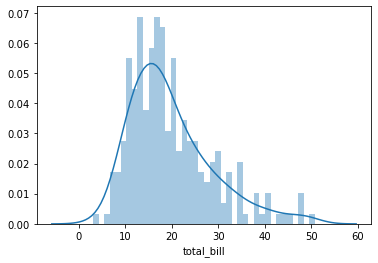

In [7]:
#Distribution plots are handy when trying to split records into buckets to observe patterns. 
# We can use the below code as an example. Let us practice and look deeper into the total_bill column.
sns.distplot(tips['total_bill'], kde=True, bins=40) # check y-axis and kde graph with kde=False

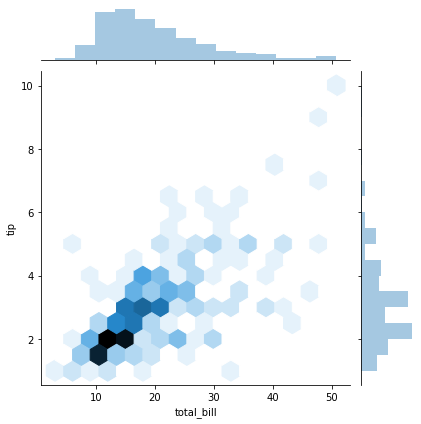

In [37]:
# This is helpful when we want to compare two distributions. Let us practice with the following…
# kind='hex' — creates a hexagon plot that has darker colors for high density areas.
# kinf='default' — creates a scatter plot with individual points
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

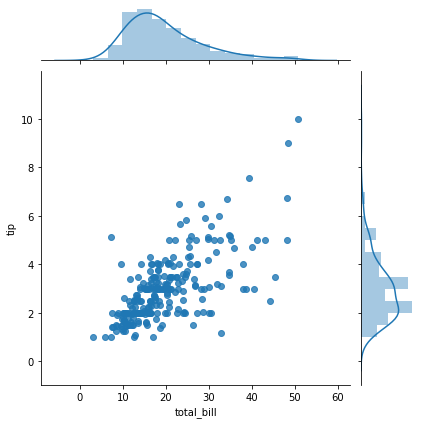

In [43]:
# kind='reg' — creates a regression line to display the linear fit
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

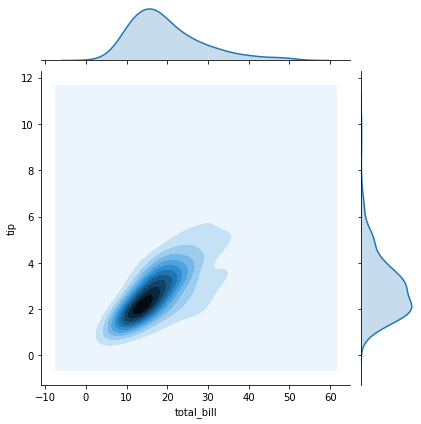

In [38]:
# kind=’kde’ — displays the density of where the points line up the most
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

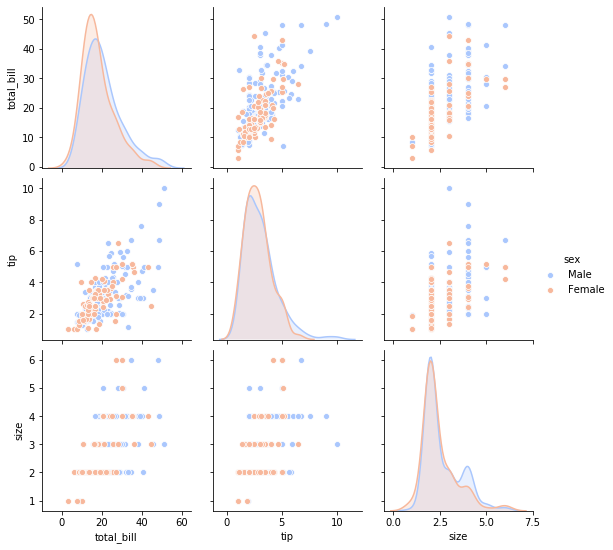

In [45]:
# Now let us look at the .pairplot() method. This is very helpful to identify relationships across the dataset.
# This plots for numerical value columns and also supports a color hue for categorical columns. 
# Basically, this generates a .jointplot() for every numerical column combination in the dataset. 
# Nice way to quickly visualize data.
sns.pairplot(tips, hue='sex', palette='coolwarm')

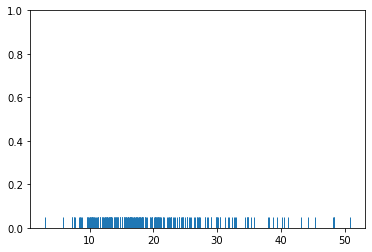

In [46]:
# .rugplot() method is used to draw lines for single variable distribution. 
# This seems to provide a more discrete visual than using the .distplot() method
sns.rugplot(tips['total_bill'])

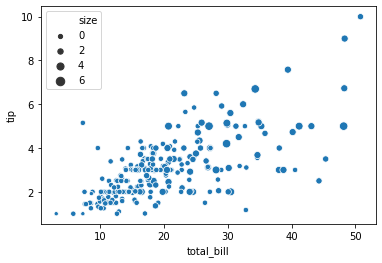

In [50]:
# Relational Plot - Figure-level interface for drawing relational plots onto a FacetGrid. 
# The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters.
sns.relplot(x="total_bill", y="tip", hue="day", data=tips)

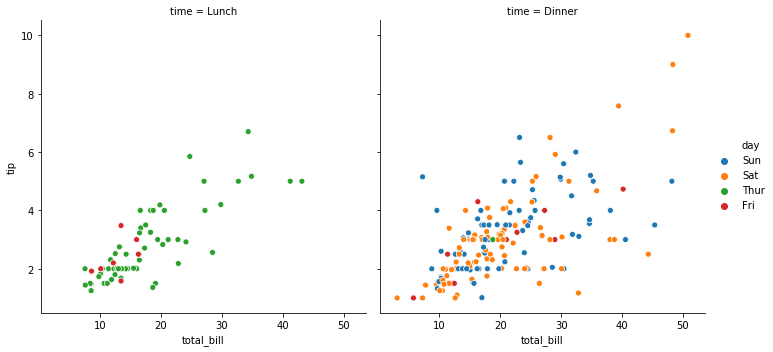

In [48]:
sns.relplot(x="total_bill", y="tip",hue="day", col="time", data=tips)

### Plotting Categorical data - https://medium.com/@kbrook10/day-3-ds-how-to-use-seaborn-for-categorical-plots-a62139ab4670

### Plotting Choropleth maps - https://medium.com/@kbrook10/day-8-data-visualization-how-to-use-choropleth-maps-63c0fedfd5e7

### PLotting Seaborn Grids - https://medium.com/@kbrook10/day-5-data-visualization-how-to-use-seaborn-grids-f11299b8bbfb